<a href="https://colab.research.google.com/github/LaymounaSa/Prediction-of--product-sales/blob/main/Projet_1_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Save the copied file path as a variable
# Surround the path with quotes
fpath  ="/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/sales_predictions_2023.csv"

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


# Define your target column:
- Item_Outlet_Sales

# Inspecting Each Feature

# 1) Item_Weight
- Weight of product

In [11]:
# Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

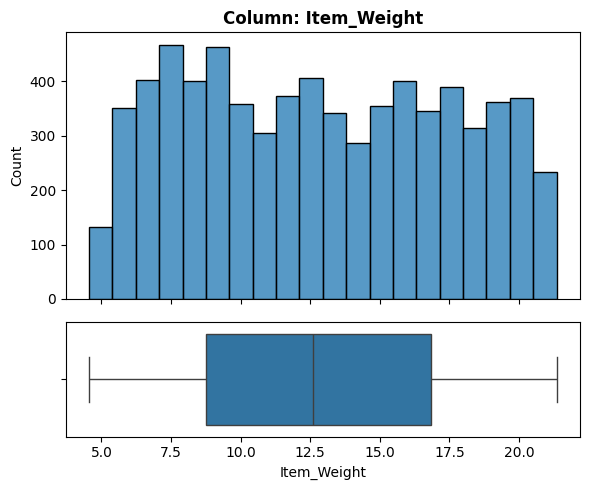

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [12]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

# Feature Observations
1) What type of feature is it? (Categorical (nominal), ordinal, numeric):

- numeric

2) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?):
- 1463 (17.17%)
- impute with median.

3) Is the feature constant or quasi-constant?
no
4) What is the cardinality? Is it high (>10)?

- Not applicable (numeric).

5) Would we know this feature before the target is determined?

- Yes

Is there a business case/understanding reason to exclude based on our business case?
- No


In [14]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

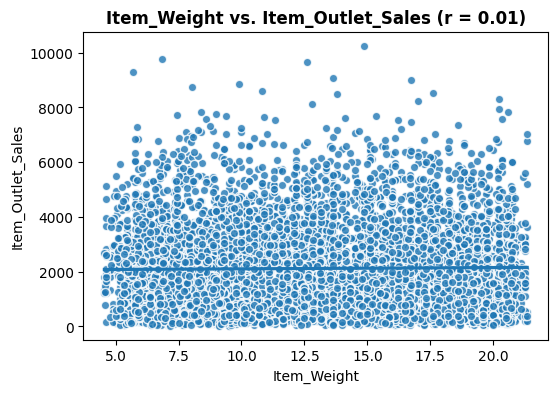

In [15]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

# Feature vs. Target Observations:
1) Based on your business understanding, would you expect this feature to be a predictor of the target?
- no relationship between item outlet sales and item weight of product.

2) Does this feature appear to be a predictor of the target?
- no this feature isn't a predictor of the target.

# Item_Fat_Content
- Whether the product is:  
-- low
-- fat  
-- regular

In [16]:
# Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

<ipython-input-8-d4c1ca917ec5>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


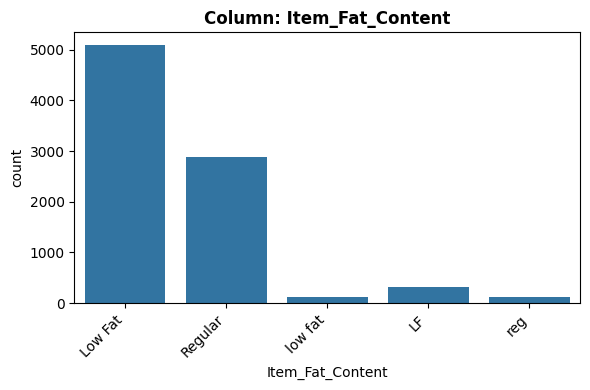

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Low Fat' occurs 5089 times (59.71%)
- Not constant or quasi-constant.


In [17]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

Feature Observations

1) What type of feature is it? (Categorical (nominal), ordinal, numeric):

Categorical

2) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?):

0 (0.0%)


3) Is the feature constant or quasi-constant? no 4) What is the cardinality? Is it high (>10)?

5 not higher.

5) Would we know this feature before the target is determined?

Yes

6) Is there a business case/understanding reason to exclude based on our business case?

No

<ipython-input-14-01ca10030bb4>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


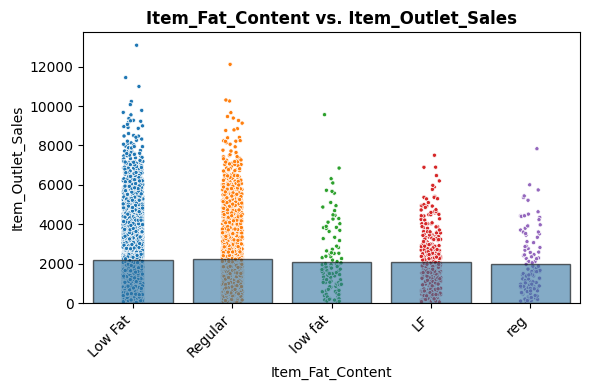

In [18]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

Feature vs. Target Observations:

1) Based on your business understanding, would you expect this feature to be a predictor of the target?

- Yes,  it was a relationship between item outlet sales and item fat content of product.

2) Does this feature appear to be a predictor of the target?

- Yes,  this feature is a predictor of the target.

# Item_Visibility
-The percentage of total display area of all products in a store allocated to the particular product

In [19]:
# Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

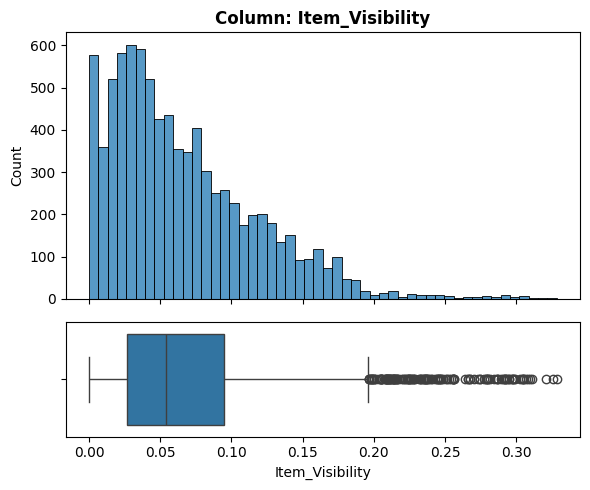

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [20]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Feature Observations

1) What type of feature is it? (Categorical (nominal), ordinal, numeric)


- numeric.

2) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- 0 (0.0%)

3) Is the feature constant or quasi-constant?


- No.

4) What is the cardinality? Is it high?


Not applicable (numeric).

5) Would we know this BEFORE the target is determined?

Yes.

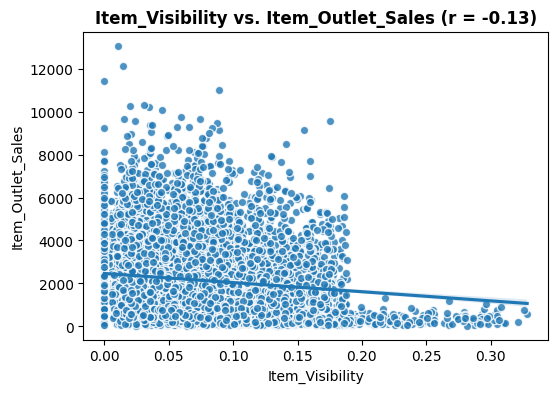

In [21]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

Feature vs. Target Observations:
1) Based on your business understanding, would you expect this feature to be a predictor of the target?

- Yes, it was a relationship between item outlet sales and item_Visibility of product.

2) Does this feature appear to be a predictor of the target?

- Yes, this feature is a predictor of the target but with negative correlation.

# Item_Type:
-The category to which the product belongs

In [22]:
# Confirming the dtype to select correct EDA function
feature = "Item_Type"
df[feature].dtype

dtype('O')

<ipython-input-8-d4c1ca917ec5>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


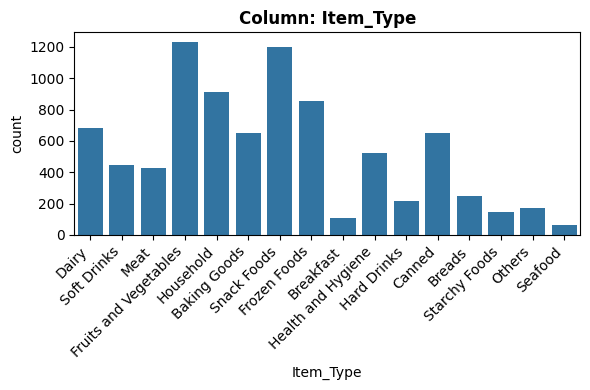

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [23]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

Feature Observations 1) What type of feature is it? (Categorical (nominal), ordinal, numeric):

- Categorical

2) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?):

- 0 (0.0%)

3) Is the feature constant or quasi-constant? no 4) What is the cardinality? Is it high (>10)?

- 16 uniques categories
- higher cardinality (>10).

5) Would we know this feature before the target is determined?

- Yes

6) Is there a business case/understanding reason to exclude based on our business case?

- No

<ipython-input-14-01ca10030bb4>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Type vs. Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>)

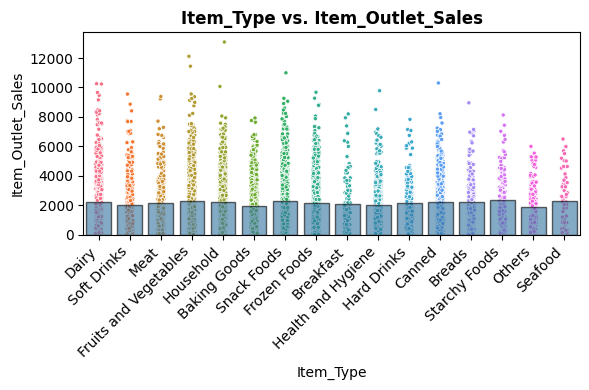

In [24]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales')

Feature vs. Target Observations:

1) Based on your business understanding, would you expect this feature to be a predictor of the target?

- No.

2) Does this feature appear to be a predictor of the target?

No it doesn't, there isn't variability between the groups, even though some have similar means.

# Item_MRP
- Maximum Retail Price (list price) of the product

In [25]:
# Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

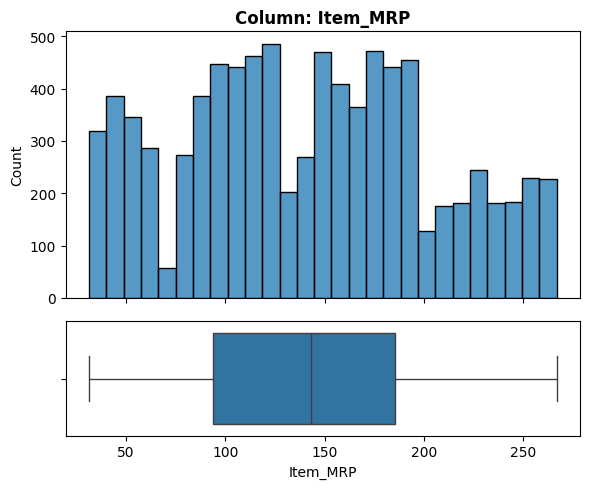

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [26]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Feature Observations

1) What type of feature is it? (Categorical (nominal), ordinal, numeric)

- numeric.
2) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- 0 null values (0.0%)


3) Is the feature constant or quasi-constant?

- No.

4) What is the cardinality? Is it high?


- Not applicable (numeric).

5) Would we know this BEFORE the target is determined?


Yes.

6) Is there a business case/understanding reason to exclude based on our business case?


No.

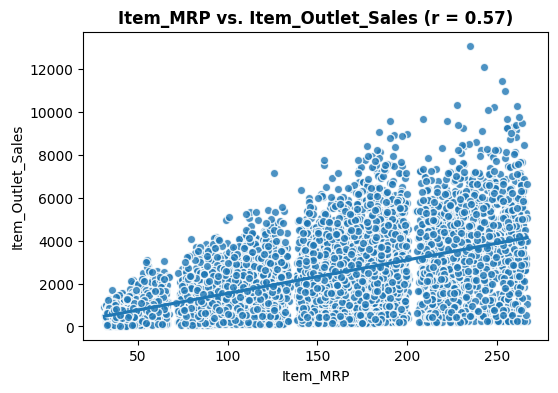

In [27]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

Feature vs. Target Observations:

1) Based on your business understanding, would you expect this feature to be a predictor of the target?

- Yes, I would assume item_MRP would be better.

2) Does this feature appear to be a predictor of the target?
Yes!

# Outlet_Identifier
-Store ID

In [28]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df[feature].dtype

dtype('O')

<ipython-input-8-d4c1ca917ec5>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


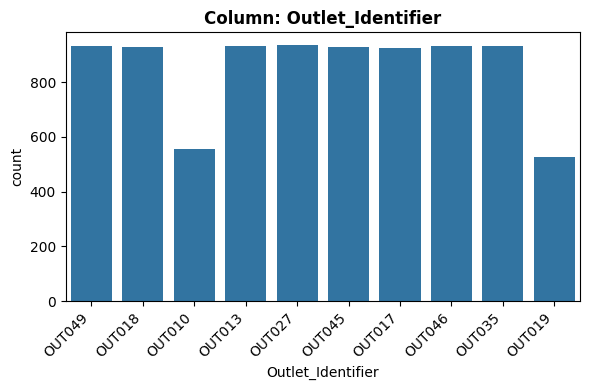

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [29]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

Feature Observations

1) What type of feature is it? (Categorical (nominal), ordinal, numeric)

- Categorical

2) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
- null values
- Nothing to impute.

3) Is the feature constant or quasi-constant?


- No.

4) What is the cardinality? Is it high?

- 10 unique values (it is high).

5) Would we know this BEFORE the target is determined?


- Yes.

6) Is there a business case/understanding reason to exclude based on our business case?

No.

<ipython-input-14-01ca10030bb4>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


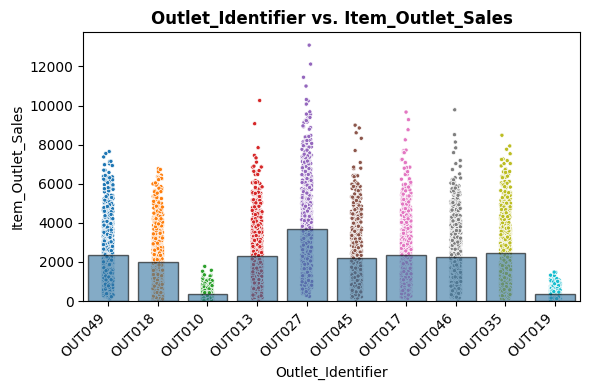

In [30]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

Feature vs. Target Observations:

1) Based on your business understanding, would you expect this feature to be a predictor of the target?

- yes, I am  sure.
2) Does this feature appear to be a predictor of the target?

2) Yes, it seems that being in the OUT027 is associated with a higher item outlet sales rating.

# Outlet_Establishment_Year  
-The year in which store was established

In [32]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

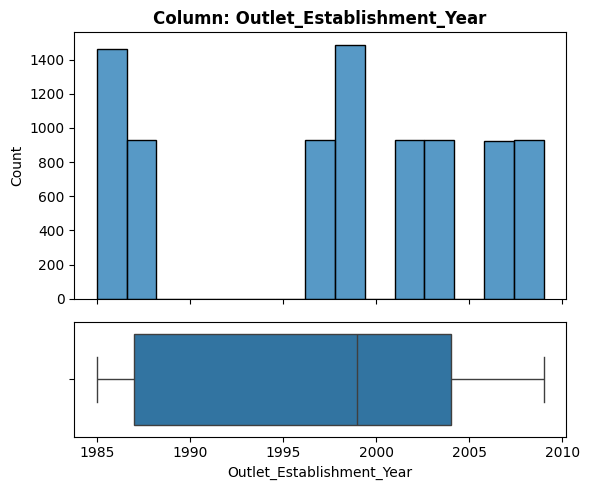

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [33]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Feature Observations

1) What type of feature is it? (Categorical (nominal), ordinal, numeric)

numeric.

2) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)


- Null values

3) Is the feature constant or quasi-constant?

- No.

4) What is the cardinality? Is it high?

- Not applicable, numeric.

5) Would we know this BEFORE the target is determined?

- Yes

6) Is there a business case/understanding reason to exclude based on our business case?


- No


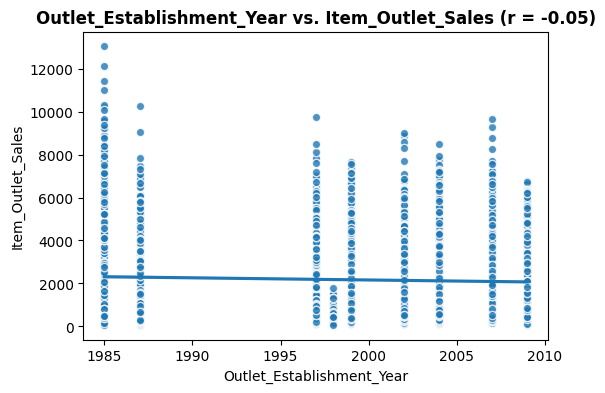

In [34]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

Feature vs. Target Observations:

1) Based on your business understanding, would you expect this feature to be a predictor of the target?

- No, I think that no relationship between item outlet sales and outlet estalishment year.

2) Does this feature appear to be a predictor of the target?
- No, it was a low and negative correlation between these two features.

 # Outlet_Size
 - The size of the store in terms of ground area covered

In [35]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

<ipython-input-8-d4c1ca917ec5>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


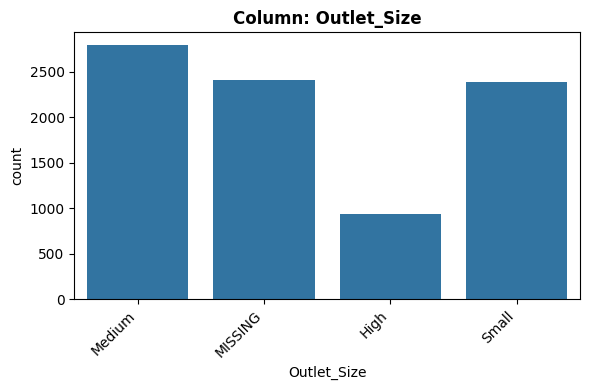

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [36]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

Feature Observations


1) What type of feature is it? (Categorical (nominal), ordinal, numeric)

Categorical

2) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- 2410 (28.28%)
- Impute with "MISSING" placeholder..

3) Is the feature constant or quasi-constant?

- No.
4) What is the cardinality? Is it high?

- 4 unique values (very low).

5) Would we know this BEFORE the target is determined?

- Yes.

6) Is there a business case/understanding reason to exclude based on our business case?

- No.

<ipython-input-14-01ca10030bb4>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


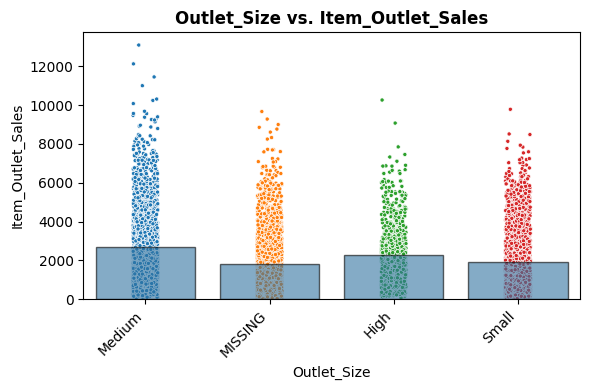

In [37]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature, 'Item_Outlet_Sales');

Feature vs. Target Observations:

1) Based on your business understanding, would you expect this feature to be a predictor of the target?

- No.

2) Does this feature appear to be a predictor of the target?

No it doesn't, there is not variability between the groups, even though some have similar means.

# Outlet_Location_Type
- The type of area in which the store is located

In [38]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

<ipython-input-8-d4c1ca917ec5>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


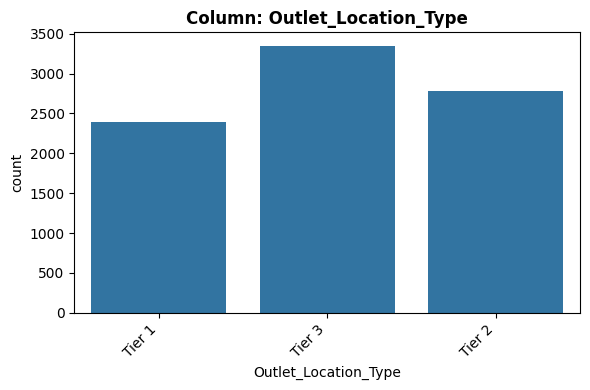

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [39]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

Feature Observations

1) What type of feature is it? (Categorical (nominal), ordinal, numeric)

- Categorical

2) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- Null values.

3) Is the feature constant or quasi-constant?

- No.

4) What is the cardinality? Is it high?

- 3 unique values (very low).

5) Would we know this BEFORE the target is determined?


- Yes.

6) Is there a business case/understanding reason to exclude based on our business case?

- No.

<ipython-input-14-01ca10030bb4>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


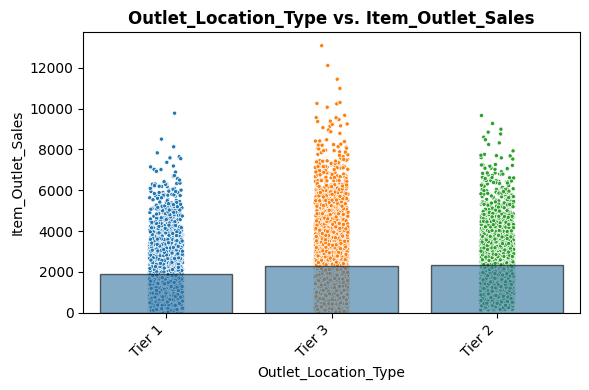

In [40]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature, 'Item_Outlet_Sales');

Feature vs. Target Observations:

1) Based on your business understanding, would you expect this feature to be a predictor of the target?

- Yes.

2) Does this feature appear to be a predictor of the target?

- Yes it does, there is variability between the groups, even though some have similar means. The Tier 3 has a higher level of item outlet sales

# Outlet_Type
Whether the outlet is a :
- grocery store  
- supermarket

In [41]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

<ipython-input-8-d4c1ca917ec5>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


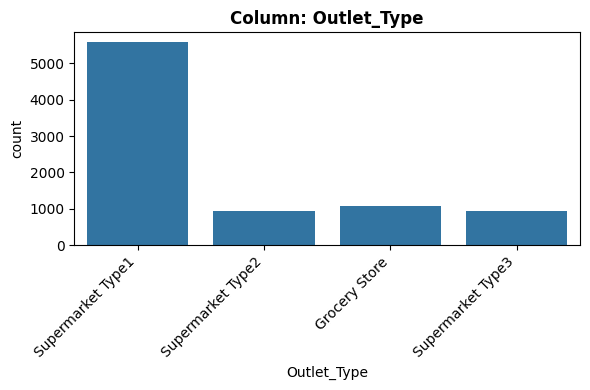

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [42]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

Feature Observations

1) What type of feature is it? (Categorical (nominal), ordinal, numeric)

- Categorical

2) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- Null values.

3) Is the feature constant or quasi-constant?


- No.

4) What is the cardinality? Is it high?


- 4 unique values (very low).

5) Would we know this BEFORE the target is determined?

Yes.
6) Is there a business case/understanding reason to exclude based on our business case?

No.

<ipython-input-14-01ca10030bb4>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


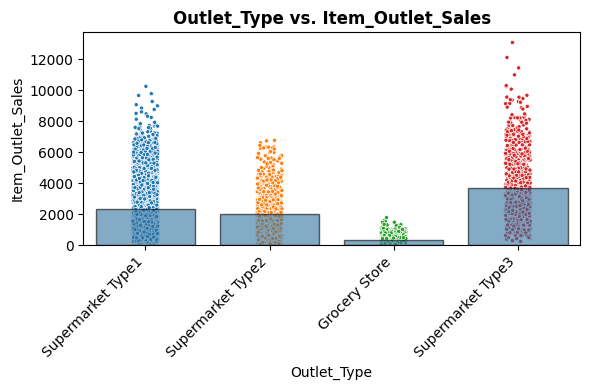

In [43]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature, 'Item_Outlet_Sales');

Feature vs. Target Observations:

1) Based on your business understanding, would you expect this feature to be a predictor of the target?

Yes.
2) Does this feature appear to be a predictor of the target?

Yes it does, there is variability between the groups, even though some have similar means. The supermarket Type 3 has a higher level of item outlet sales

# Item_Outlet_Sales
- Sales of the product in the particular store.
- This is the target variable to be predicted.

In [44]:
# Confirming the dtype to select correct EDA function
feature = "Item_Outlet_Sales"
df[feature].dtype

dtype('float64')

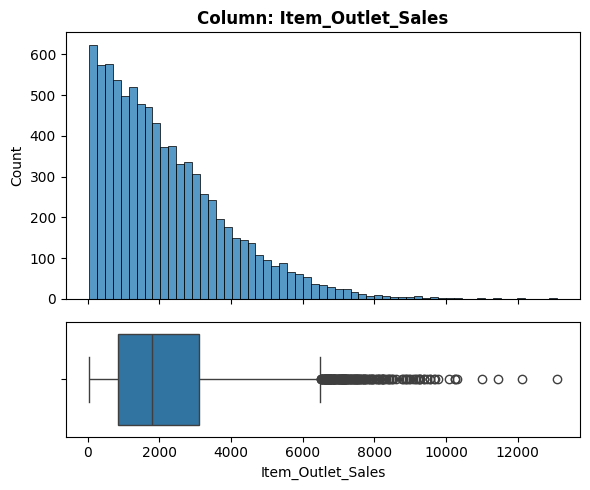

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [45]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

Feature Observations

1) What type of feature is it? (Categorical (nominal), ordinal, numeric)

- numeric. our target!

2) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- Null values

3) Is the feature constant or quasi-constant?

- Not a feature!

4) What is the cardinality? Is it high?

- N/A - numeric.

5) Would we know this BEFORE the target is determined?

- Yes, since it IS our target!

6) Is there a business case/understanding reason to exclude based on our business case?

- Yes, its our target!
